<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Visualización y limpieza con Pandas

Visualización de los datos del dataset futbol\
v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('partidos.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/partidos.csv > partidos.csv
    else:
        !wget partidos.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/partidos.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 3070k    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
 10 3070k   10  312k    0     0   312k      0  0:00:09  0:00:01  0:00:08  210k
100 3070k  100 3070k    0     0  1535k      0  0:00:02  0:00:02 --:--:-- 1336k


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [3]:
df = pd.read_csv("partidos.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,home_score,away_score
count,41586.000000,41586.000000
mean,1.745756,1.187587
std,1.753780,1.405323
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000
Nan,0.000000,0.000000
%Nan,0.000000,0.000000


In [4]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
# ¿Cuántos datos quedaron para analizar?
# (filas, columnas)
df.shape

(41586, 9)

## Fin de la limpieza
No hay datos incompletos o mal ingresados en el dataset, está limpio! No es necesario ningún tipo de limpieza

In [6]:
print('Cantidad de datos en observacion:', df.shape[0])

Cantidad de datos en observacion: 41586


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [7]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


Se puede observar que está el puntaje de cada partido pero no el resultado final (wins, loses, draws) --> (ganó, perdió, empató). Agregaremos una columna "results" con el resultado por partido.

In [8]:

df['result'] = df.apply(lambda x : 'wins' if x.home_score > x.away_score else 'loses' if x.home_score < x.away_score else 'draws', axis=1)
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draws
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,wins
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,wins
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draws
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,wins


In [9]:
# En el registro de la totalidad de partidos, ¿Cuántos partidos se ganaron, cuántos se pierden y cuántos se empataron?
df['result'].value_counts()

wins     20234
loses    11774
draws     9578
Name: result, dtype: int64

In [10]:
# Renderizamos el gráfico utilizando el diagrama de cajas
print("¿Cuántos países hay registrados?:", df['home_team'].nunique())

¿Cuántos países hay registrados?: 308


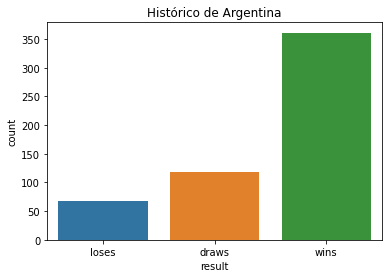

In [11]:
# Partidos jugados por Argentina de local:
pais_analizar = 'Argentina'
df_arg = df[ df['home_team'] == pais_analizar]
sns.countplot(x='result', data=df_arg).set_title(f"Histórico de {pais_analizar}")
# El countplot nos resuelve no tener que hacer lo siguiente:
#sns.barplot(x=df_arg['result'].value_counts().index, y=df_arg['result'].value_counts())
plt.show()